In [1]:
from preprocessing import train_data, validation_data, test_data

Found 10000 files belonging to 2 classes.
Found 1500 files belonging to 2 classes.
Found 1500 files belonging to 2 classes.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Utility to analyze dataset
def analyze_dataset(dataset, dataset_name="Dataset"):
    class_counts = {}
    total_samples = 0

    for _, labels in dataset:
        for label in labels.numpy():
            label = int(label)
            if label not in class_counts:
                class_counts[label] = 0
            class_counts[label] += 1
            total_samples += 1

    print(f"Analysis of {dataset_name}:")
    print(f"Total samples: {total_samples}")
    for label, count in class_counts.items():
        print(f"Class {label}: {count} samples ({(count / total_samples) * 100:.2f}%)")

    return class_counts

# Visualize a few samples from the dataset
def visualize_samples(dataset, dataset_name="Dataset", num_samples=9):
    plt.figure(figsize=(10, 10))
    for i, (images, labels) in enumerate(dataset.take(1)):
        for j in range(num_samples):
            ax = plt.subplot(3, 3, j + 1)
            plt.imshow(images[j].numpy().astype("uint8"))
            plt.title(f"Label: {int(labels[j].numpy())}")
            plt.axis("off")
    plt.suptitle(f"{dataset_name} Samples")
    plt.show()

# Analyze the datasets
train_class_counts = analyze_dataset(train_data, "Train Dataset")
val_class_counts = analyze_dataset(validation_data, "Validation Dataset")
test_class_counts = analyze_dataset(test_data, "Test Dataset")

C:\Users\user\AppData\Local\Temp\ipykernel_6776\3648246709.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(label)


Analysis of Train Dataset:
Total samples: 10000
Class 1: 5000 samples (50.00%)
Class 0: 5000 samples (50.00%)
Analysis of Validation Dataset:
Total samples: 1500
Class 0: 750 samples (50.00%)
Class 1: 750 samples (50.00%)
Analysis of Test Dataset:
Total samples: 1500
Class 0: 750 samples (50.00%)
Class 1: 750 samples (50.00%)


In [20]:
import numpy as np
from PIL import Image, ImageEnhance, ImageOps
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import random

def load_image(photo_link):
    """Load an image from a URL and convert it to a PIL Image."""
    response = requests.get(photo_link)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img = img.resize((224, 224))  # Resize for consistency
    return img

def random_flip(image):
    """Apply random horizontal flip."""
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def random_rotation(image, max_angle=25):
    """Apply random rotation within a specified range."""
    angle = random.uniform(-max_angle, max_angle)
    return image.rotate(angle)

def random_zoom(image, zoom_factor=0.4):  # Increased zoom for visibility
    """Apply random zoom by cropping and resizing the image."""
    width, height = image.size
    crop_width = int(width * (1 - zoom_factor))
    crop_height = int(height * (1 - zoom_factor))
    image = image.crop(((width - crop_width) // 2, (height - crop_height) // 2,
                        (width + crop_width) // 2, (height + crop_height) // 2))
    return image.resize((width, height))

def random_brightness(image, factor=0.5):  # Increased brightness adjustment
    """Adjust brightness randomly within a specified range."""
    enhancer = ImageEnhance.Brightness(image)
    brightness_factor = 1 + random.uniform(-factor, factor)
    return enhancer.enhance(brightness_factor)

def random_contrast(image, factor=0.5):  # Increased contrast adjustment
    """Adjust contrast randomly within a specified range."""
    enhancer = ImageEnhance.Contrast(image)
    contrast_factor = 1 + random.uniform(-factor, factor)
    return enhancer.enhance(contrast_factor)

def add_gaussian_noise(image, mean=0, stddev=25):  # Increased noise level
    """Add Gaussian noise to the image."""
    np_image = np.array(image).astype(np.float32)
    noise = np.random.normal(mean, stddev, np_image.shape)
    np_image += noise
    np_image = np.clip(np_image, 0, 255).astype(np.uint8)
    return Image.fromarray(np_image)

def display_augmentations(image):
    """Display the image with each augmentation applied."""
    plt.figure(figsize=(12, 12))

    # Original image
    plt.subplot(3, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    # Apply each augmentation and display
    augmentations = [
        (random_flip, "Random Flip"),
        (random_rotation, "Random Rotation"),
        (random_zoom, "Random Zoom"),
        (random_brightness, "Random Brightness"),
        (random_contrast, "Random Contrast"),
        (add_gaussian_noise, "Gaussian Noise")
    ]

    for i, (aug_func, title) in enumerate(augmentations, start=2):
        aug_image = aug_func(image)
        plt.subplot(3, 3, i)
        plt.imshow(aug_image)
        plt.title(title)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


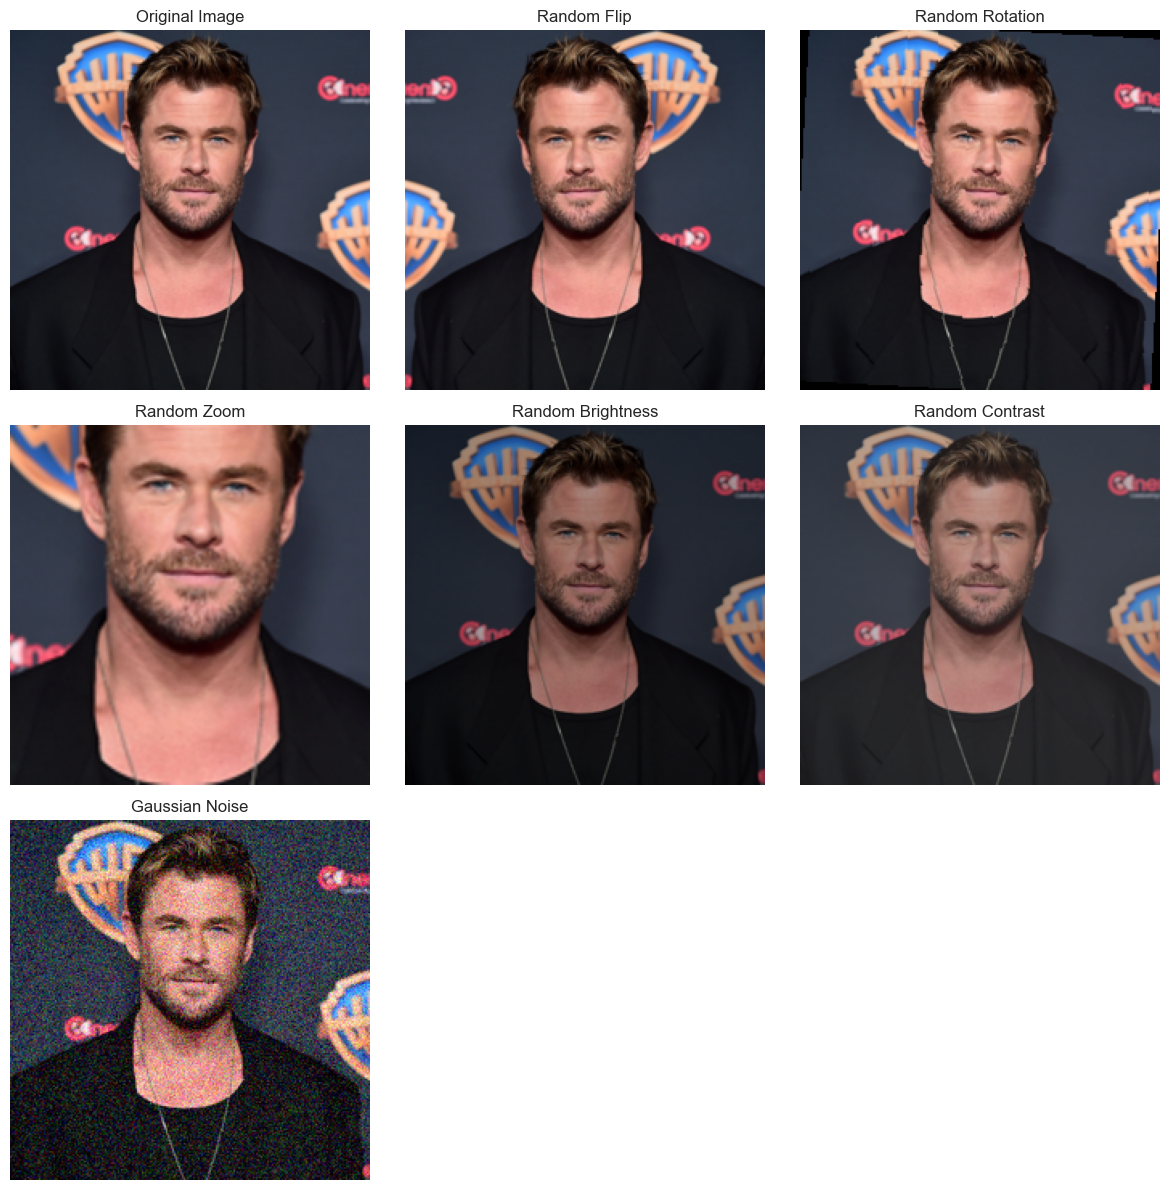

In [22]:
photo_link = "https://akns-images.eonline.com/eol_images/Entire_Site/2024330/cr_1200x1200-240430094756-GettyImages-2148068620.jpg?fit=around%7C1200:1200&output-quality=90&crop=1200:1200;center,top"
image = load_image(photo_link)
display_augmentations(image)
